In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 

## list in classes, wouldnt let me write array

## 1.C)

In [116]:
import os

# Check if the environment variable KAGGLE_KERNEL_RUN_TYPE is set
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    current_path = Path("/kaggle/input/dog-cats-images")
    data_path = current_path/"experiment_small_data"
    
else:
    current_path= Path().absolute()         # current path

test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [117]:
train_path

PosixPath('/kaggle/input/dog-cats-images/train/train')

In [118]:
original_data_path= current_path/ "original_data"   # original data folder path
original_data_path.mkdir(exist_ok=True)             # making the folder

In [119]:
if test_path.exists():  # if the folders exist in test test, then move it to original
    shutil.move(test_path, original_data_path)
if train_path.exists():
    shutil.move(train_path, original_data_path)

In [120]:
experimental_small= current_path/"experiment_small_data"
experimental_small.mkdir(exist_ok=True)

experimental_small_train= experimental_small/"train"
experimental_small_train.mkdir(exist_ok=True)

experimental_small_test= experimental_small/"test"
experimental_small_test.mkdir(exist_ok=True)

experimental_small_val= experimental_small/"val"
experimental_small_val.mkdir(exist_ok=True)

In [121]:
folders_delete = [  # list of folders to delete
    current_path / "test",
    current_path / "train",
]

for folder in folders_delete:   # delete folder if it exists
    if folder.exists():
        shutil.rmtree(folder)

## 1.A/B)

In [122]:
original_data= current_path/"original_data" # path original data
test_data_path= original_data/"test" # new test data
train_data_path= original_data/"train"   # new train data

In [123]:
train_list= list(train_data_path.iterdir())  # list of the image train paths
test_list= list(test_data_path.iterdir())  # list of the image test paths

In [124]:
pictures= np.random.choice(train_list, 10)  # ten random paths
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

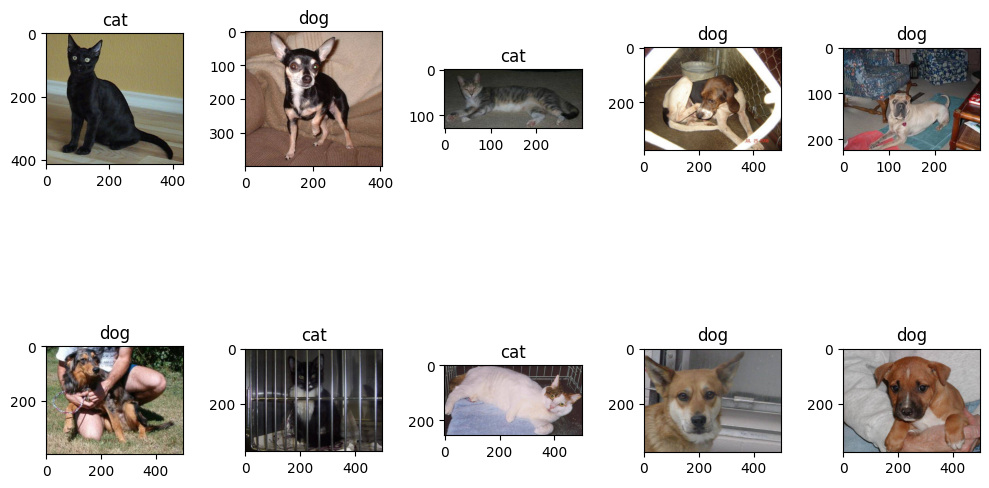

In [125]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data_path/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D)

In [126]:
def dogs_cats(train_test_val:list, animal_needed:int):
    
    total_dogs= [dog for dog in train_test_val if "dog" in dog.name]   # picking out all dogs
    np.random.shuffle(total_dogs)   # shuffle

    dogs= total_dogs[:animal_needed]    # picking number of dogs we need
    
    
    """Same thins for cats"""
    total_cats= [cat for cat in train_test_val if "cat" in cat.name]
    np.random.shuffle(total_cats)

    cats= total_cats[:animal_needed]
    
    for dog, cat in zip(dogs, cats):    # remove selected paths
        total_dogs.remove(dog)
        total_cats.remove(cat)
        
    updated_list = [animal for animal in train_test_val if animal not in dogs and animal not in cats] # updated list with non of the selected antimals to return
        
    total_data= []
    for dog, cat in zip(dogs, cats):    # list of the data set that you requested
        total_data.append(dog)
        total_data.append(cat)
    return total_data, updated_list

In [127]:
train_data_small, train_list= dogs_cats(train_list, 800)
test_data_small, train_list= dogs_cats(train_list, 250)
val_data_small, train_list= dogs_cats(train_list, 200)

print(f"train: {len(train_data_small)}\ntest: {len(test_data_small)}")

train: 1600
test: 500


In [128]:
import os

def move_list_to_folder(data_path, data_set:list):
    empty= any(os.scandir(data_path))   # checks if folder is empty and gives empty true or false
    
    """Checks if it is empty. If it is it adds the paths to the folder, if it's not empty, it prints a message"""
    if not empty:
        for path in data_set:
            shutil.move(path, data_path)
    else:
        print("This directory is not empty.")

In [129]:
move_list_to_folder(experimental_small_train, train_data_small)
move_list_to_folder(experimental_small_test, test_data_small)
move_list_to_folder(experimental_small_val, val_data_small)

This directory is not empty.
This directory is not empty.
This directory is not empty.


## 1.E)

In [130]:
train_list= list(experimental_small_train.iterdir())    # lsit of the paths
test_list= list(experimental_small_test.iterdir())    # lsit of the paths
val_list= list(experimental_small_val.iterdir())    # lsit of the paths

In [131]:
def label_data(data:list):
    """Labels the lists with 1 or 0 for dog and cat"""
    labels= []
    images= []
    np.random.shuffle(data)   #shuffel to see random images
    for path in data:    # setting labels 1 for dog, 0 for cat
        label= 1 if "dog" in path.name else 0
        labels.append(label)
        
        image= cv2.imread(str(path))
        images.append(image)
        
    return images, np.array(labels)


In [132]:
X_train, y_train= label_data(train_list)
X_test, y_test= label_data(test_list)
X_val, y_val= label_data(val_list)

In [133]:
"""Plotting to see if labels were correctly added"""
def plot_image(images:list, labels:list):
    fig, axes= plt.subplots(2, 5, figsize= (12, 6))
    
    for i, ax in enumerate(axes.flatten()):
        
        ax.imshow(images[i])    # plotting the image
        ax.set_title(labels[i])  # and setting the title

    fig.tight_layout()

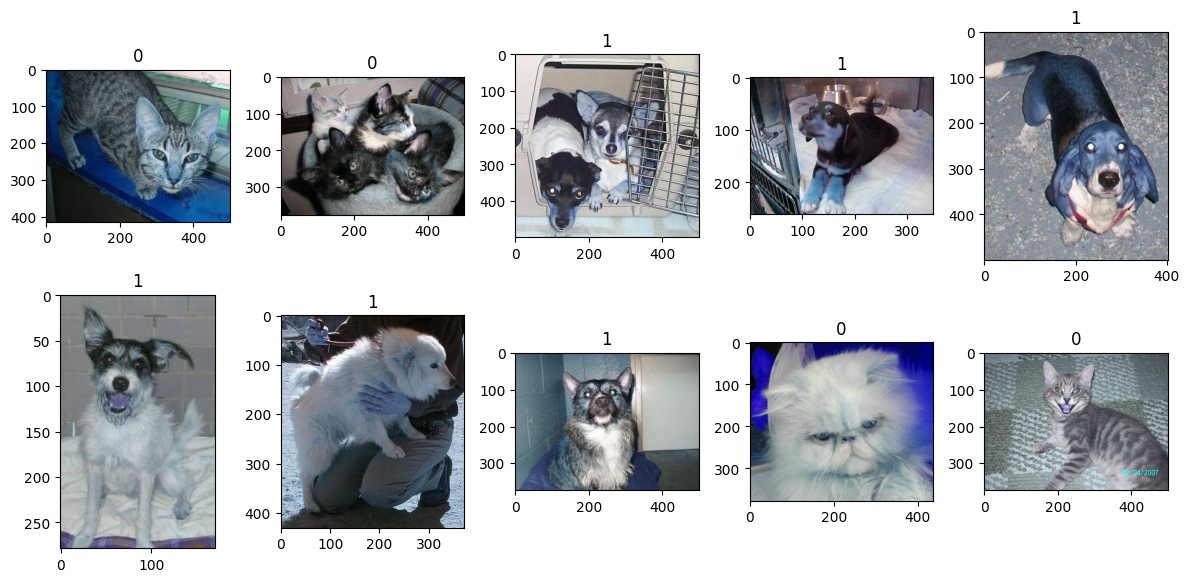

In [134]:
plot_image(X_train, y_train)

In [135]:
def plot(images:list, labels:list):
    """From list to df for plotting"""

    df = pd.DataFrame(
        {
            "image": images,
            "label": labels
        }
    )
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count")

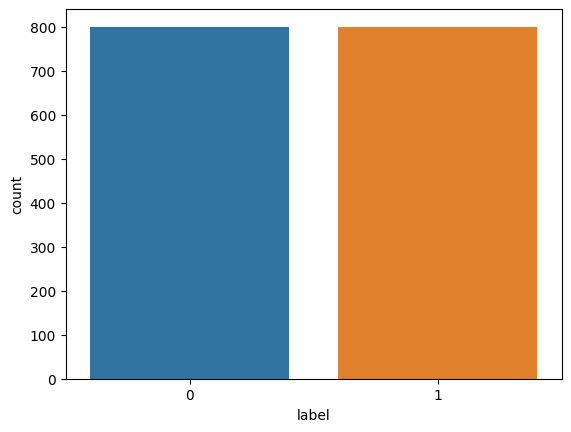

In [136]:
plot(X_train, y_train)

## 2.A)

In [137]:
def image_sizes(data:list):
    """Gives list of the image sizes from the chosen data"""
    image_sizes= []
    
    for image in data:
        image_size= image.shape[:2]
        image_sizes.append(image_size)
        
    return image_sizes

In [138]:
train_sizes= image_sizes(X_train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


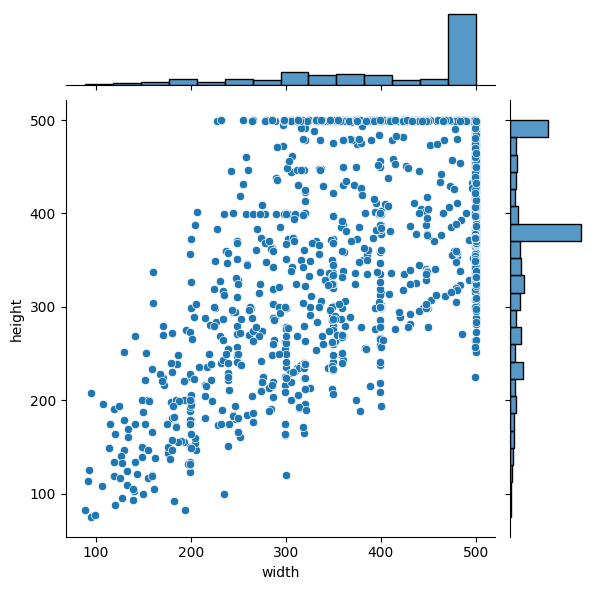

In [139]:
df_train_sizes= pd.DataFrame(data= train_sizes, columns= ["height", "width"])
"""Scatter for every image, width and height also has a histogram"""
sns.jointplot(data= df_train_sizes, x= "width", y= "height")

## 2.B) testing later if i need to change


## 2.C)

In [140]:
def resize(data:list, size= (180, 200)): # tried (150, 150), (250, 250), (100, 100), and some more, (180, 200) has been most consistent
    """reads in image and resize, returns in a numpy array"""
    resized_images= []
    for image in data:
        
        resized_image= cv2.resize(image, size)
        resized_images.append(resized_image)
        
    return np.array(resized_images)

In [141]:
X_train= resize(X_train)
X_test= resize(X_test)
X_val= resize(X_val)

In [142]:
X_train.shape

(1600, 200, 180, 3)

## 2.D)

## 3.A)

In [143]:
X_train.shape[1:]

(200, 180, 3)

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

"""making our first model for non augmented and augmented data"""
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 256]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    for kernel in kernels:# conv layer and maxpooling 4 each
        conv_layer = Conv2D(
            kernel,
            kernel_size= (3, 3),
            activation= "relu",
            kernel_initializer= "he_normal",
            input_shape= X_train.shape[1:],
        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size= [2,2], strides= 2))   # picks the max numbers to minimize the the calculation. 4 at a time, and moving 2 every time
        
    model.add(Flatten())    # flatten to a 1D array
    model.add(Dropout(dropout_rate))    # reducing overfitting, 30% are changed back to 0
    model.add(Dense(512, activation= "relu"))
    
    model.add(Dense(1, activation= "sigmoid"))  # sigmoid used for binary classification 1 or 0, since we have to diffrent animals
    model.compile(loss= 'binary_crossentropy', optimizer= adam, metrics= ['accuracy'])  # binary crossentroy for classification, adam learing speed for updating the models weights and accuracy "in focus"
    
    return model

In [145]:
model= cnn_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 198, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 99, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 97, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 48, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 46, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 23, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 21, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 10, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    11,796,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,185,921 (46.49 MB)

 Trainable params: 12,185,921 (46.49 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
"""Scaling the data by dividing by 255 which is the max number in rgb"""
scaled_X_train= X_train.astype("float32")/ 255
scaled_X_test= X_test.astype("float32")/ 255
scaled_X_val= X_val.astype("float32")/ 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

In [147]:
from tensorflow.keras.callbacks import EarlyStopping
"""Making a early stopper that stops if 10 epochs dont give better result based om val accuracy"""
early_stopper = EarlyStopping(monitor= "val_acc", mode= "max", patience= 10, restore_best_weights= True)

In [148]:
"""Training the model on the scaled data, saving the history dict to later be able to plot on every model. Avoiding .history.history exhausted"""
history_1= model.fit(
    scaled_X_train,
    y_train,
    epochs= 10,  # 10 epochs due to overfitting
    callbacks= [early_stopper],
    validation_data= (scaled_X_val, y_val),
)

Epoch 1/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5069 - loss: 9.4613

W0000 00:00:1716473685.448509      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4935 - loss: 4.0071

W0000 00:00:1716473688.230442      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4936 - loss: 3.9178 - val_accuracy: 0.5575 - val_loss: 0.6915
Epoch 2/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5694 - loss: 0.6907

W0000 00:00:1716473688.615386      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5373 - loss: 0.6910 - val_accuracy: 0.5625 - val_loss: 0.6795
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5696 - loss: 0.6803 - val_accuracy: 0.5800 - val_loss: 0.6709
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5965 - loss: 0.6786 - val_accuracy: 0.6075 - val_loss: 0.6694
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6235 - loss: 0.6218 - val_accuracy: 0.5775 - val_loss: 0.6747
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6644 - loss: 0.5935 - val_accuracy: 0.5475 - val_loss: 0.6694
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6841 - loss: 0.5753 - val_accuracy: 0.5650 - val_loss: 0.7372
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7262 - loss: 0.4996 - val_accuracy: 0.6000 - val_loss: 0.8060
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7977 - loss: 0.3928 - val_accuracy: 0.6075 - val_loss: 0.

In [149]:
"""history history to get the history dict from the model. Which is the metrics of the training"""
metrics= pd.DataFrame(history_1.history)

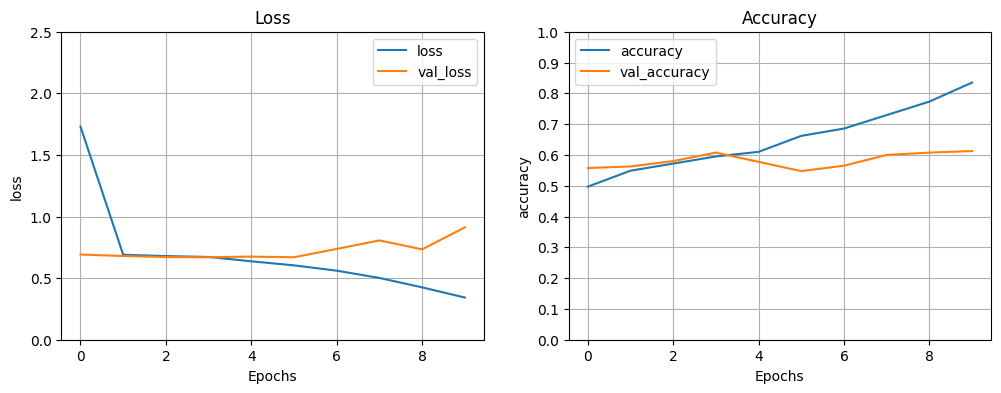

In [150]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel= "Epochs", ylabel= "loss")
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel= "Epochs", ylabel= "accuracy")
    ax[0].set_yticks(np.arange(0, 3, 0.5))
    ax[1].set_yticks(np.arange(0, 1.1, 0.1))

plot_metrics(metrics)   # Sign of overfitting probably due to to little data"""

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [152]:
y_pred= model.predict(scaled_X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [153]:
y_test.dtype, (y_pred > .5)[:5]

(dtype('int64'),
 array([[ True],
        [False],
        [ True],
        [ True],
        [ True]]))

In [154]:
cm= confusion_matrix(y_val, y_pred > .5)
cm

array([[115,  85],
       [ 70, 130]])

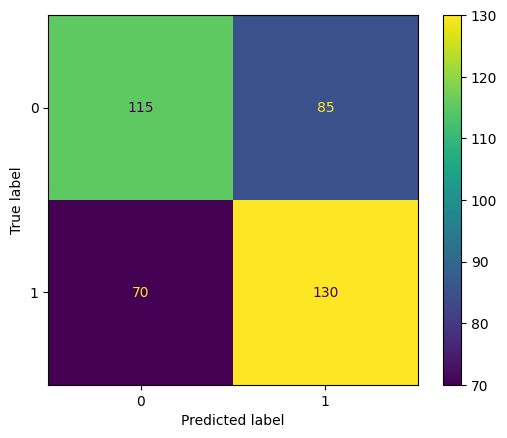

In [155]:
ConfusionMatrixDisplay(cm).plot()

In [156]:
print(classification_report(y_val, y_pred > .5))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       200
           1       0.60      0.65      0.63       200

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400



In [157]:
model_2= cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [158]:
"""Modifying when testing"""
"""The settings for the augmentation testing around a little to learn how it affects"""
train_image_generator = ImageDataGenerator(
    rotation_range=5,  # rotaiting the image
    shear_range=0.1,    # changing angle slightly
    zoom_range=0.1,     # zoom variation
    horizontal_flip=True,  # no horizontal mirroring
    height_shift_range=0.2, # moves picture up and down
    width_shift_range=0.2,  # moves picture left and right
)

In [159]:
"""Changing the shape order"""
scaled_X_train= np.transpose(scaled_X_train, (0, 2, 1, 3))
scaled_X_val= np.transpose(scaled_X_val, (0, 2, 1, 3))


In [160]:
test_image_generator = ImageDataGenerator()
"""Instanciating the augmentation with flow"""
train_generator = train_image_generator.flow(scaled_X_train, y_train, batch_size= 32)
val_generator = test_image_generator.flow(scaled_X_val, y_val, batch_size= 32)

steps_per_epochs= len(X_train)// 32// 2 # Making the batch size for steps per epochs
validation_steps= len(X_val)// 32// 2 # Batch size for validationsteps, needs to be the "same size" / same division as the steps per epoch
steps_per_epochs, validation_steps

(25, 6)

In [161]:
"""training our first model on the augmented data to see if it learns more"""
history_2= model_2.fit(
    train_generator,
    steps_per_epoch= steps_per_epochs,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= val_generator, # whis will give us batches for validation
    validation_steps= validation_steps,
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/25 ━━━━━━━━━━━━━━━━━━━━ 2:10 5s/step - accuracy: 0.5625 - loss: 1.1907

W0000 00:00:1716473716.064822      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.5118 - loss: 7.0586 - val_accuracy: 0.5104 - val_loss: 0.6882
Epoch 2/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4688 - loss: 0.6950

W0000 00:00:1716473721.807148      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5276 - loss: 0.6894 - val_accuracy: 0.4896 - val_loss: 0.6949
Epoch 3/100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4375 - val_loss: 0.6966
Epoch 4/100


W0000 00:00:1716473726.335751      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.5027 - loss: 0.6904 - val_accuracy: 0.6094 - val_loss: 0.6817
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.5531 - loss: 0.6884 - val_accuracy: 0.5469 - val_loss: 0.6788
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6454
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.5773 - loss: 0.6969 - val_accuracy: 0.5469 - val_loss: 0.6876
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.5129 - loss: 0.6873 - val_accuracy: 0.6094 - val_loss: 0.6756
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 0.7207
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.5188 - loss: 0.6947 - val_accuracy: 0.4479 - val_loss: 0.6984
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.5100 - loss: 0.6885 - va

In [162]:
y_pred= model_2.predict(scaled_X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [163]:
cm= confusion_matrix(y_val, y_pred > .5)

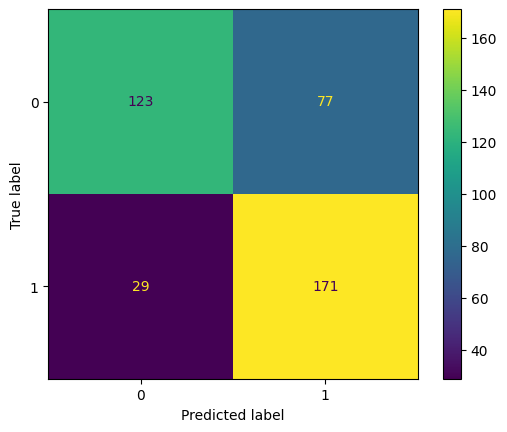

In [164]:
ConfusionMatrixDisplay(cm).plot()

In [165]:
metrics_2= pd.DataFrame(history_2.history)
metrics_2.head()

,accuracy,loss,val_accuracy,val_loss
0,0.51125,3.116271,0.510417,0.688228
1,0.52500,0.690798,0.489583,0.694922
2,0.00000,0.000000,0.437500,0.696633
3,0.51875,0.690230,0.609375,0.681706
4,0.56750,0.683324,0.546875,0.678842


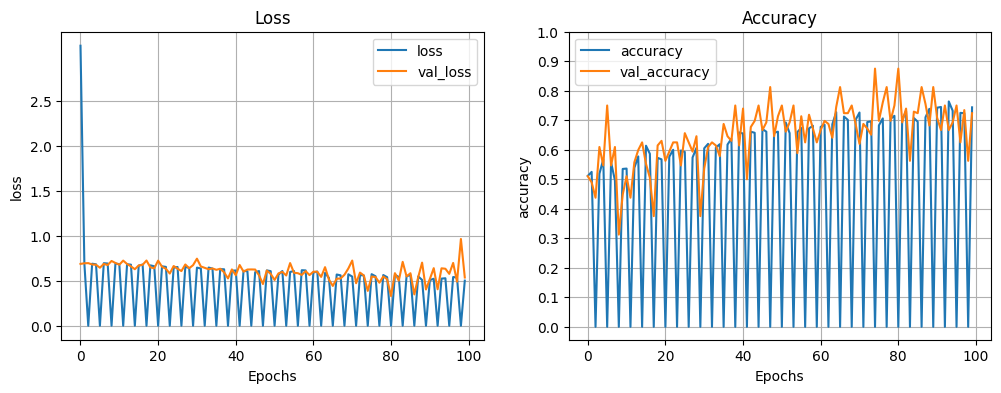

In [166]:
plot_metrics(metrics_2)   # Sign of overfitting probably due to to little data

### Can't plot metrics due to empty history. exhausted?

In [167]:
from tensorflow.keras.applications import Xception

In [168]:
from tensorflow.keras.layers import GlobalAveragePooling2D

input_shape = (180, 200, 3)


def xception_model(learning_rate=0.001, dropout_rate=0.3):
    """Function to create a model from xception"""
    feature_extractor = Xception(weights='imagenet', include_top=False, input_shape=input_shape)    # extractor for features but include_top= false removes last layers that makes the prediction
                                                                                                    # Keeping the convolutional layers that has been trained on imagenet
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(
        [
            # Our own MLP with the feature extractor as base/using the weights, taken the earlier one
            feature_extractor,
            GlobalAveragePooling2D(),
            Dropout(.3),
            Dense(512, activation= "relu", kernel_initializer= "he_normal"),
            Dropout(dropout_rate), 
            Dense(1, activation= "sigmoid"),
        ]
    )
    # Making the layers in the extracor non trainable. So only using our MLP to train
    for layer in feature_extractor.layers:
        layer.trainable= False

    model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
    
    return model

xception_model_1= xception_model()
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 198, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 99, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 97, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 48, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 46, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 23, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 21, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 10, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    11,796,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,557,765 (139.46 MB)

 Trainable params: 12,185,921 (46.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,371,844 (92.97 MB)

In [169]:
print("scaled_X_train shape:", scaled_X_train.shape)
print("scaled_X_val shape:", scaled_X_val.shape)

scaled_X_train shape: (1600, 180, 200, 3)
scaled_X_val shape: (400, 180, 200, 3)


In [170]:
"""training the model xception model on regular data first"""
xception_history_1= xception_model_1.fit(
    scaled_X_train,
    y_train,
    epochs= 50,
    callbacks= [early_stopper],
    validation_data= (scaled_X_val, y_val),
)

Epoch 1/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 7:10 9s/step - accuracy: 0.5312 - loss: 0.7677

W0000 00:00:1716474128.060177      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7614 - loss: 0.5060

W0000 00:00:1716474136.337213      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.7627 - loss: 0.5038 - val_accuracy: 0.8700 - val_loss: 0.2894
Epoch 2/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9688 - loss: 0.2005

W0000 00:00:1716474139.024439      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.9027 - loss: 0.2397 - val_accuracy: 0.8825 - val_loss: 0.2970
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9168 - loss: 0.1972 - val_accuracy: 0.8575 - val_loss: 0.3633
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9237 - loss: 0.1787 - val_accuracy: 0.8625 - val_loss: 0.3781
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9444 - loss: 0.1242 - val_accuracy: 0.8825 - val_loss: 0.3012
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.9438 - loss: 0.1331 - val_accuracy: 0.8825 - val_loss: 0.3297
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9311 - loss: 0.1683 - val_accuracy: 0.8900 - val_loss: 0.3431
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9755 - loss: 0.0760 - val_accuracy: 0.8700 - val_loss: 0.3915
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9703 - loss: 0.0743 - val_accuracy: 0.8800 - val_

 3/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step

W0000 00:00:1716474439.509845      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step


W0000 00:00:1716474443.098570      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


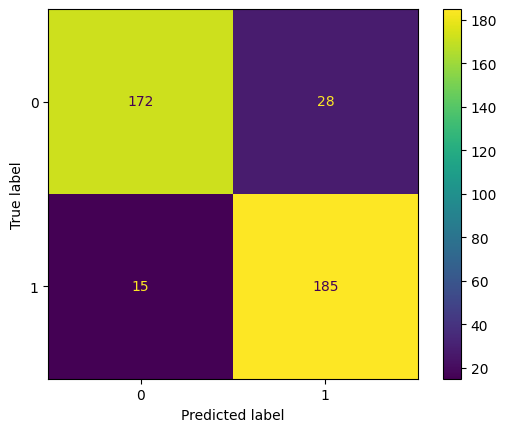

In [171]:
y_pred= xception_model_1.predict(scaled_X_val)
cm= confusion_matrix(y_val, y_pred > .5)
ConfusionMatrixDisplay(cm).plot()

In [172]:
metrics_3= pd.DataFrame(xception_history_1.history)
metrics_3.head()

,accuracy,loss,val_accuracy,val_loss
0,0.826875,0.393643,0.8700,0.289405
1,0.886875,0.250654,0.8825,0.297028
2,0.922500,0.191015,0.8575,0.363305
3,0.928750,0.173193,0.8625,0.378073
4,0.944375,0.132993,0.8825,0.301161


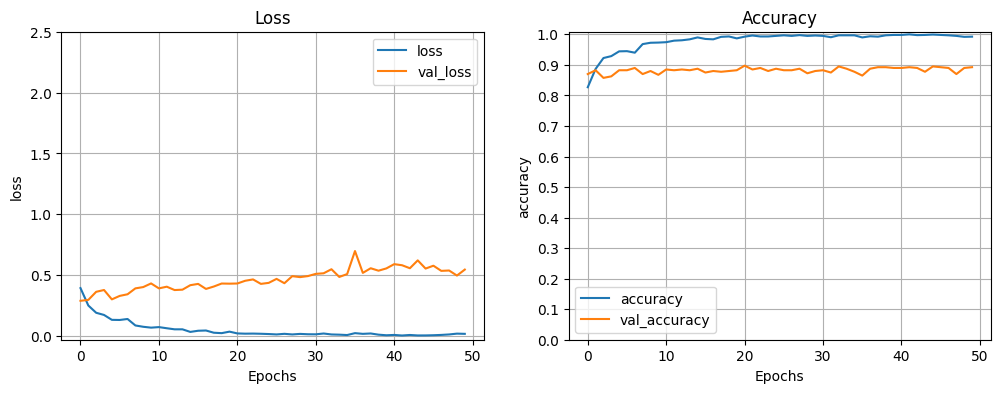

In [173]:
plot_metrics(metrics_3)   # Sign of overfitting probably due to to little data

In [174]:
xception_model_2= xception_model()

In [175]:
"""training the model on augmented data"""
xception_history_2= xception_model_2.fit(
    train_generator,
    steps_per_epoch= steps_per_epochs,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= val_generator, # whis will give us batches for validation
    validation_steps= validation_steps,
)

Epoch 1/100
 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.4844 - loss: 0.7270

W0000 00:00:1716474456.403917      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7104 - loss: 0.5428

W0000 00:00:1716474464.705904      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - accuracy: 0.7129 - loss: 0.5402 - val_accuracy: 0.8698 - val_loss: 0.3568
Epoch 2/100
 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8359 - loss: 0.4190

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8385 - loss: 0.3866 - val_accuracy: 0.8646 - val_loss: 0.3412
Epoch 3/100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4881
Epoch 4/100


W0000 00:00:1716474471.710348      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.8682 - loss: 0.3113 - val_accuracy: 0.8281 - val_loss: 0.3861
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.8726 - loss: 0.3087 - val_accuracy: 0.8698 - val_loss: 0.2736
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3881
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.8735 - loss: 0.3229 - val_accuracy: 0.8490 - val_loss: 0.3331
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.8808 - loss: 0.2738 - val_accuracy: 0.8490 - val_loss: 0.3625
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.1409
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.8747 - loss: 0.2891 - val_accuracy: 0.8854 - val_loss: 0.2810
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.8927 - loss: 0.2692 - val_ac

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

W0000 00:00:1716474900.632768      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step


W0000 00:00:1716474904.219413      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


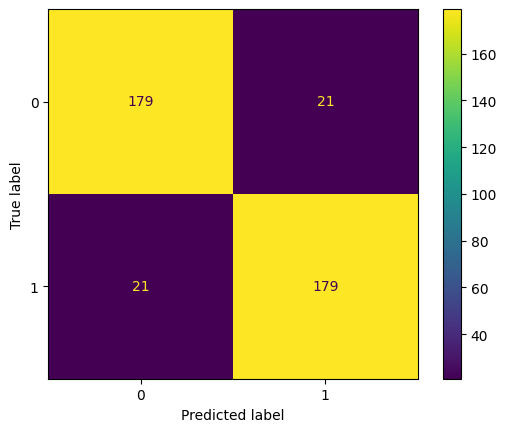

In [176]:
y_pred= xception_model_2.predict(scaled_X_val)
y_pred[:5]
cm= confusion_matrix(y_val, y_pred > .5)
ConfusionMatrixDisplay(cm).plot()

In [177]:
metrics_4= pd.DataFrame(xception_history_2.history)
metrics_4.head()

,accuracy,loss,val_accuracy,val_loss
0,0.77500,0.473507,0.869792,0.356768
1,0.83500,0.391643,0.864583,0.341189
2,0.00000,0.000000,0.875000,0.488103
3,0.86000,0.313329,0.828125,0.386109
4,0.87875,0.301936,0.869792,0.273596


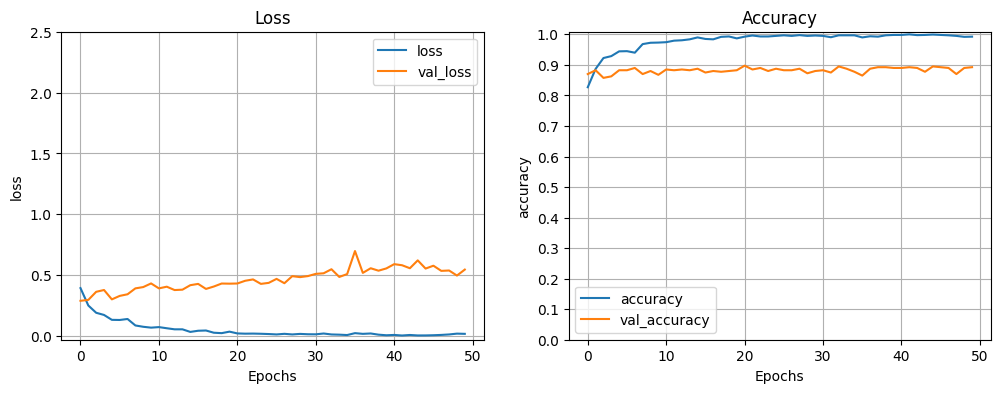

In [178]:
plot_metrics(metrics_3)

In [179]:
y_pred= xception_model_2.predict(scaled_X_test)

 2/16 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step

W0000 00:00:1716474908.181849      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step


W0000 00:00:1716474911.044015      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


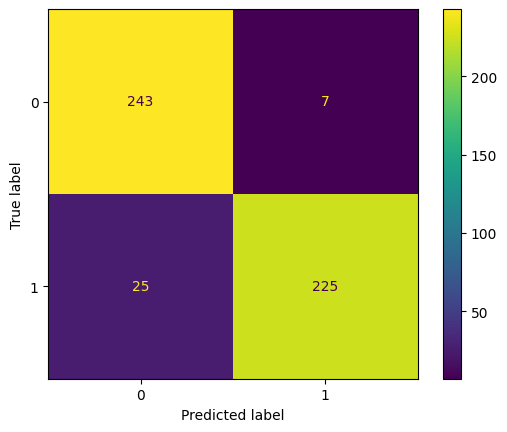

In [180]:
cm= confusion_matrix(y_test, y_pred > .5)
ConfusionMatrixDisplay(cm).plot()

In [181]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.97      0.90      0.93       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



### I chose xception transfer learning with augmented data